# Ayudantía 4: Cinemática en Python

Para la siguiente ayudantía nos basaremos principalmente en la documentación de *PyDy* que pueden encontrar en el siguiente link https://docs.sympy.org/latest/modules/physics/vector/kinematics.html

## Introducción a PyDy y SymPy

### 1. Velocidad angular

En el siguiente ejemplo, tenemos un cuerpo rígido cúbico que realiza 3 rotaciones distintas.
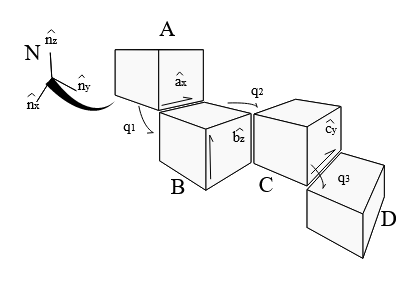

Como se puede observar del diagrama se tienen 5 distintos sistemas de referencia (uno general, y los otros 4 se plantean luego de cada rotación).Matematicamente las velocidades angulares se pueden describir de la siguiente forma:

\\[
\begin{align*}
^N\omega^A &= 0 \\
^A\omega^B &= \dot{q_1}\hat{a}_x \\
^B\omega^C &= \dot{-q_2}\hat{b}_z \\
^C\omega^D &= \dot{q_3}\hat{c}_y \\
\end{align*}
\\]

Con esto la velocidad angular total, es decir vista desde el sistema de referencia **N**, se escribe de la siguiente forma:

\\[^N\omega^D = \dot{q_1}\hat{a}_x \dot{-q_2}\hat{b}_z +\dot{q_3}\hat{c}_y\\]

### 1.1 Velocidad angular (código)

Primero, veamos como se utiliza la libreria de  *PyDy* para marcar sistemas de referencia, rotaciones, etc.

In [1]:
#Importacion de las librerias y funciones
import sympy as sp
from sympy import Symbol, sin, cos
from sympy.physics.vector import *

In [2]:
N = ReferenceFrame('N')  ### Declarar el sistema de referencia general

#init_vprinting(pretty_print=False) esta funcion es util para lo que no usan Jupyter

q1 = dynamicsymbols('q1') ### se define el simbolo q1
A = N.orientnew('A', 'Axis', [q1, N.x]) ### se marca el siguiente sistema de referencia
A.ang_vel_in(N) #se imprime la velocidad angular


Derivative(q1(t), t)*N.x

Ahora, avanzamos con el ejemplo que tenemos

In [3]:
### Declarar los sistemas de referencia 
N = ReferenceFrame('N')
A = ReferenceFrame('A')
B = ReferenceFrame('B')
C = ReferenceFrame('C')
D = ReferenceFrame('D')
### Se definen los simbolos de las velocidades angulares
u1, u2, u3 = dynamicsymbols('omega1 omega2 omega3')
### Se calculan las velocidades angulares
A.set_ang_vel(N, 0)
B.set_ang_vel(A, u1 * A.x)
C.set_ang_vel(B, -u2 * B.z)
D.set_ang_vel(C, u3 * C.y)
### Se imprime la velocidad angular respento al sistema de referencia N
D.ang_vel_in(N)

omega1(t)*A.x - omega2(t)*B.z + omega3(t)*C.y

### 2. Velocidad y aceleracion de un punto fijo

En el siguiente ejemplo tenemos un disco rígido que esta girando, transladandose y que contiene un punto **P**:

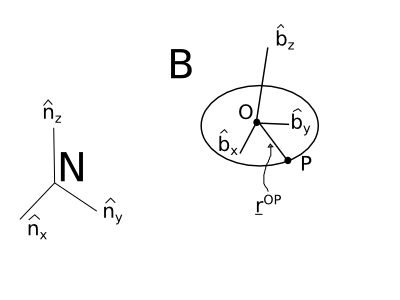

Las velocidades del disco **O** se pueden definir como:

\\[
\begin{align*}
^N\omega^B &= u_3\hat{n}_z = u_3\hat{n}_z  \\
^Nv^O &= u_1\hat{n}_x + u_2\hat{n}_y  \\
\end{align*}
\\]

Y las aceleraciones se pueden definir como:

\\[
\begin{align*}
^N\alpha^B &= \dot{u_3}\hat{n}_z = \dot{u_3}\hat{n}_z  \\
^Na^O &= \dot{u_1}\hat{n}_x + \dot{u_2}\hat{n}_y  \\
\end{align*}
\\]

Por otra parte, podemos determinar la velocidad y la aceleracion del punto **P** con lo que hemos visto en el curso:

\\[
\begin{align*}
r_{OP} &= d \hat{b}_x \\
^Nv^P &= ^Nv^O + ^N\omega^B \times r_{OP} \\
^Nv^P &= u_1\hat{n}_x + u_2\hat{n}_y + u_3\hat{n}_z \times  d \hat{b}_x  = u_1\hat{n}_x + u_2\hat{n}_y + u_3d\hat{b}_y  \\
\end{align*}
\\]

\\[
\begin{align*}
^Na^P &= ^Nv^O+N_\omega B \times r_{OP} \\
^Na^P &= \dot{u_1}\hat{n}_x + \dot{u_2}\hat{n}_y+ \dot{u_3}\hat{n}_z \times  d \hat{b}_x + u_3\hat{b}_z \times(u_3\hat{b}_z \times d \hat{b}_x) \\
^Na^P &= \dot{u_1}\hat{n}_x + \dot{u_2}\hat{n}_y+ d\dot{u_3}\hat{b}_y -  du_3^2\hat{b}_x
\end{align*}
\\]



### 2.1 Velocidad y aceleracion de un punto fijo (código)

In [4]:
N = ReferenceFrame('N') #Se declara el sistema de referencia N
u1, u2, u3 = dynamicsymbols('u1 u2 omega3') #Se declaran las velocidades
d = Symbol('d') #Distancia vector OP
B = ReferenceFrame('B') #Se declara el sistema de referencia B
O = Point('O') #Se declara el punto P
O.set_vel(N, u1 * N.x + u2 * N.y) #Se relacionan las velocidades con los sistemas de referencia
P = O.locatenew('P', d * B.x) #Se declara el punto P en ralacion al punto O y su distancia respecto al sistema B
B.set_ang_vel(N, u3 * B.z) #Se relaciona el sistema B con N


In [5]:
P.v2pt_theory(O, N, B) #Se obtiene la velocidad del punto P

u1(t)*N.x + u2(t)*N.y + d*omega3(t)*B.y

In [6]:
P.a2pt_theory(O, N, B) # Se obtiene la aceleración del punto P

Derivative(u1(t), t)*N.x + Derivative(u2(t), t)*N.y - d*omega3(t)**2*B.x + d*Derivative(omega3(t), t)*B.y

## Ejemplo: Brazo Robótico (2D)

Se desea evaluar el movimiento de un brazo robótico como se observa en la siguiente figura:

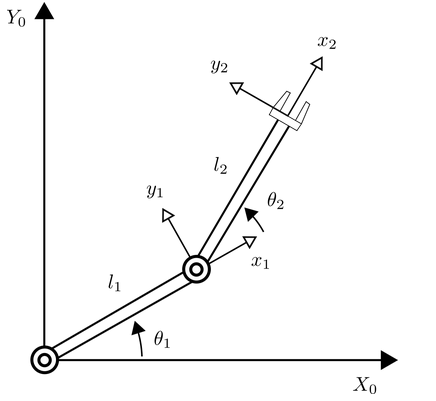

Utilizando sus conocimientos de Python y SymPy, grafique la posición del *grip*  en función de los angulos \\(\theta_1, \theta_2\\), sabiendo que \\(l_1 \\) y \\(l_2 =\\) 15 mm 

In [7]:
import sympy as sp
from sympy import Symbol, sin, cos
from sympy.physics.vector import *

In [8]:
#Cambia el formato en que se imprimen las variables
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

In [9]:
#1er Paso: Definir variables
theta1, theta2, l1, l2, theta, alpha, a, d = dynamicsymbols('theta1 theta2 l1 l2 theta alpha a d')

In [11]:
#2do Paso: Definir sistemas de referencia
sist_base = ReferenceFrame('B')
sist_hombro = ReferenceFrame('H')
sist_codo = ReferenceFrame('C')
sist_mano = ReferenceFrame('M')

In [13]:
#3er Paso: Definir Orientaciones
sist_hombro.orient(sist_base, 'Axis', [theta1, sist_base.z])
sist_codo.orient(sist_hombro, 'Axis', [theta2, sist_hombro.z])
sist_mano.orient(sist_codo, 'Axis', [0, sist_codo.z])

In [14]:
#4to Paso: Definir matriz de transformacion homogenea
MH = sist_base.dcm(sist_mano)

In [15]:
#5to Paso: Definir conexiones
base = Point('O')
hombro = Point('0')
codo = Point('1')
mano = Point('2')

In [16]:
#6to Paso: Definir la posicion relativa de los puntos
hombro.set_pos(base,0*sist_base.x)
codo.set_pos(hombro, l1*sist_hombro.x)
mano.set_pos(codo, l2*sist_codo.x)

In [17]:
#Verificamos la posicion de la mano
pxy = (mano.pos_from(base).express(sist_base)).simplify() #Posicion general
print('Posicion General: ')
pxy

Posicion General: 


(l1*cos(theta1) + l2*cos(theta1 + theta2))*B.x + (l1*sin(theta1) + l2*sin(theta1 + theta2))*B.y

In [18]:
px = l1*sp.cos(theta1) + l2*sp.cos(theta1+theta2) #Posicion en x
print('Posicion en x: ')
px

Posicion en x: 


l1*cos(theta1) + l2*cos(theta1 + theta2)

In [19]:
py = l1*sp.sin(theta1)+l2*sp.sin(theta1+theta2)#Posicion en y
print('Posicion en y: ')
py

Posicion en y: 


l1*sin(theta1) + l2*sin(theta1 + theta2)

In [20]:
#7mo Paso: Definir las funciones de posicion
fx = sp.lambdify((l1, l2, theta1, theta2), px, 'numpy')
fy = sp.lambdify((l1, l2, theta1, theta2), py, 'numpy')

In [22]:
#8vo Paso: Graficar
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2r = np.deg2rad

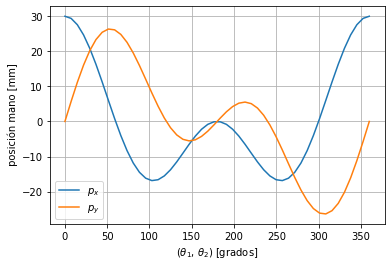

In [24]:
theta1s = np.linspace(d2r(0), d2r(360)) # rango theta 1
theta2s = np.linspace(d2r(0), d2r(360)) # rango theta 2

zx = np.array(fx(15.0, 15.0, theta1s, theta2s)) 

zy = np.array(fy(15.0, 15.0, theta1s, theta2s))

fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(theta1s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(theta1s), zy, label = r'$p_y$')
ax1.set_xlabel(r'($\theta_1$, $\theta_2$) [grados]')
ax1.set_ylabel(r' posición mano [mm]')
plt.legend()
plt.grid()


Basado en el trabajo de Sajid Nisar